# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [36]:
df = pd.read_csv ('SINASC_RO_2019.CSV')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [37]:
inter = [0, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_Categoria'] = pd.cut(df['APGAR5'], bins=inter, labels=categorias, right=False)

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_Categoria
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,NaN
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,NaN
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,NaN
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,NaN


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

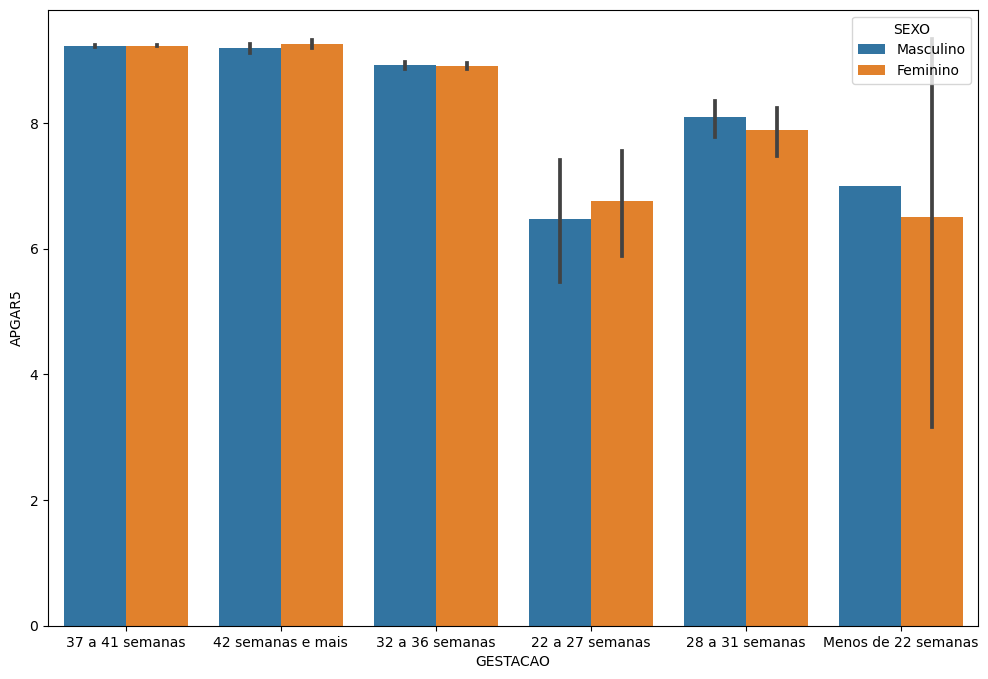

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [39]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5_Categoria'])
freq

APGAR5_Categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,15,7,2,53
28 a 31 semanas,2,6,14,127
32 a 36 semanas,6,10,28,1725
37 a 41 semanas,28,12,66,15133
42 semanas e mais,1,0,2,472
Menos de 22 semanas,2,0,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [40]:
porcentagem = freq.apply(lambda r: r/r.sum(), axis=1) * 100
porcentagem

APGAR5_Categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,19.480519,9.090909,2.597403,68.831169
28 a 31 semanas,1.342282,4.026846,9.395973,85.234899
32 a 36 semanas,0.339175,0.565291,1.582815,97.512719
37 a 41 semanas,0.183739,0.078745,0.433099,99.304416
42 semanas e mais,0.210526,0.000000,0.421053,99.368421
Menos de 22 semanas,33.333333,0.000000,0.000000,66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

APGAR5_Categoria     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 15                 7             2      53
28 a 31 semanas                  2                 6            14     127
32 a 36 semanas                  6                10            28    1725
37 a 41 semanas                 28                12            66   15133
42 semanas e mais                1                 0             2     472
Menos de 22 semanas              2                 0             0       4
GESTACAO
22 a 27 semanas           77
28 a 31 semanas          149
32 a 36 semanas         1769
37 a 41 semanas        15239
42 semanas e mais        475
Menos de 22 semanas        6
dtype: int64
APGAR5_Categoria     asfixia grave  asfixia moderada  asfixia leve    normal
GESTACAO                                                                    
22 a 27 semanas           0.194805          0.0909

<Axes: xlabel='GESTACAO'>

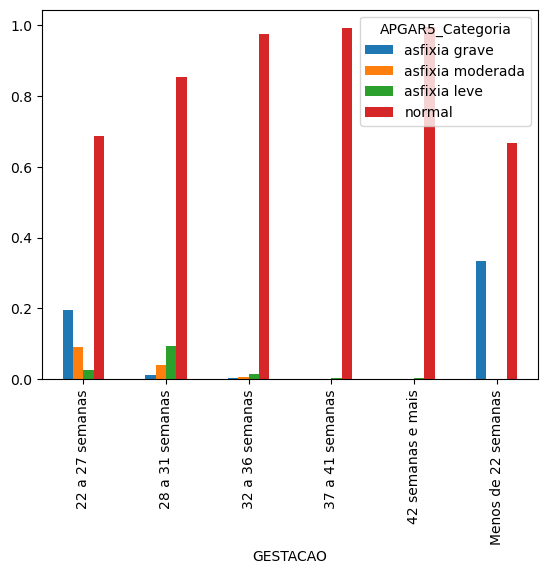

In [41]:
porcentagem = pd.crosstab(df['GESTACAO'], df['APGAR5_Categoria'])
porcentagem
print(porcentagem)
print(porcentagem.sum(1))

porcentagem_pctlin = porcentagem.div(porcentagem.sum(axis = 1), axis = 0)
print(porcentagem_pctlin)

porcentagem_pctlin.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

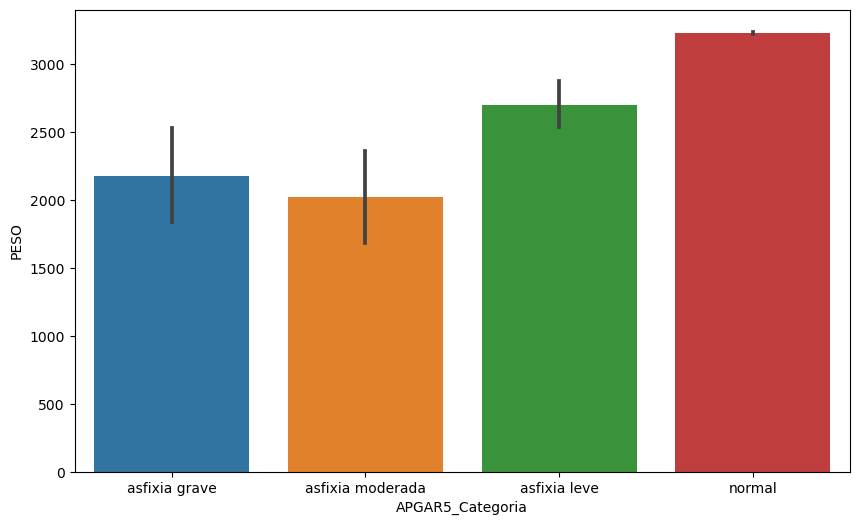

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='APGAR5_Categoria', y='PESO', data=df)
plt.show()